# Advanced Visualization

`Matplotlib` is the most popular plotting package for mathmatians, scientists, statisticsts, ML/AI programmers in Python.

* Matplotlib is designed to be as usable as MATLAB, with the ability to use Python, and the advantage of being free and open-source.
* John D. Hunter (1968-2012), the original author of Matplotlib
    > Matplotlib is a library for making 2D plots of arrays in Python. Although it has its origins in emulating the MATLAB graphics commands, it is independent of MATLAB, and can be used in a Pythonic, object-oriented way. Although Matplotlib is written primarily in pure Python, it makes heavy use of NumPy and other extension code to provide good performance even for large arrays.
* From matplotlib.org
    > Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. Matplotlib makes easy things easy and hard things possible.

In this notebook, we will learn a few more advanced tips about matplotlib.


2024.05.26
Kuo-Chuan Pan

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import ndimage

# Advanced Visualizaion for Project 1

Let's recall in the project 1, we have learned how to solve an Initial Value Problem (IVP) numerically. Let's use our IVP solver to generate some numerical data for visualization.

In [2]:
from project1.solution.solver_sol import solve_ivp

In [3]:
# define the y' funciotn
def func_forced(t,y,K,M,L,F0,WF):
    force = -K * y[0] - L * y[1] + F0*np.cos(WF*t)    # F = - k v - L v + F0 sin(WF t)
    f = np.zeros(len(y))
    f[0] = y[1]                      # y'[0] = v
    f[1] = force/M                   # y'[1] = a = F/M
    return f

In [4]:
# Prepare the input arguments
t_span = np.linspace(0,100, 5001)
t_eval = t_span
A = 1
y = np.array([A,0]) # initial condition
K = 1
M = 1
L = 0.1
F0 =0.1
WF = 0.1
args = (K,M,L,F0,WF)

# use the IVP solver
sol = solve_ivp(func_forced,t_span,y, "RK4", t_eval, args)

In [5]:
# Compared with the particular solution
omega0 = np.sqrt(K/M)
gamma  = L/(2*M)
D = F0/np.sqrt((omega0**2 - WF**2)**2 + 4*WF**2*gamma**2)
delta = np.arctan(2*WF*gamma/(omega0**2 - WF**2)) 

xp = D * np.cos(WF*t_eval - delta)

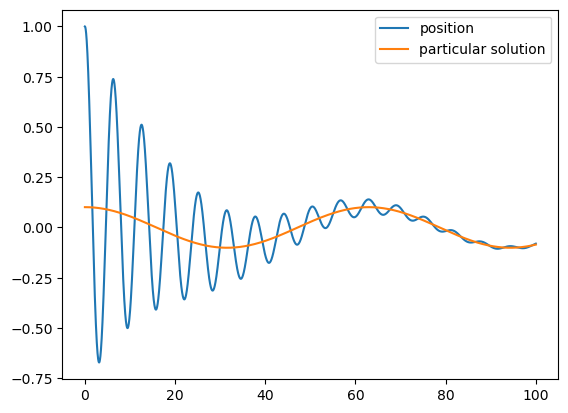

In [6]:
# visualize the results
plt.plot(t_eval, sol[0], label="position")
plt.plot(t_eval, xp, label="particular solution")
plt.legend()
plt.show()

The plot with default setup is not too bad. But could we improve this Figure?\
Of course, the first thing is that we have to add the x-labe and y-label in the plot. 

Before we start any modification let's check the version of matplotlib first. You need to have version higher than 3.7.2 for better consistency. 

In [7]:
# display your matplotlib version
print(matplotlib.__version__)

3.7.1


There are several predefined "styles" in matplotlib. 
See https://matplotlib.org/stable/users/explain/customizing.html#using-style-sheets for more information.

In [8]:
# Try one style first.
plt.style.use('seaborn-v0_8-pastel')

You could also check the available styles by running

In [9]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


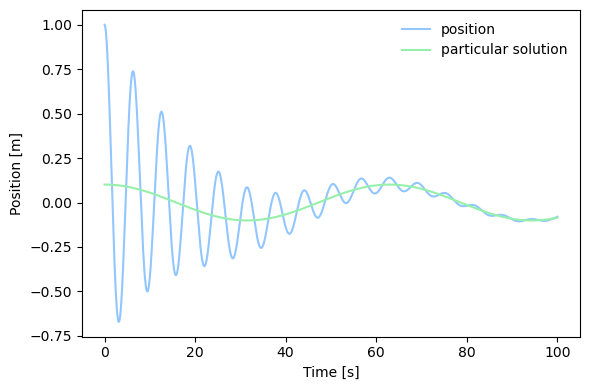

In [10]:
# Make a new plot with the new style
plt.figure(figsize=(6,4))
plt.plot(t_eval, sol[0], label="position")
plt.plot(t_eval, xp, label="particular solution")
plt.xlabel("Time [s]")
plt.ylabel("Position [m]")
plt.legend(loc="upper right", frameon=False, ncol=1)
plt.tight_layout() # make the layout nice and compact
plt.savefig("forced_oscillator_v1.pdf", dpi=300)

If you don't like the predefined colors, you could find the color hex codes online.\
For example, https://colorhunt.co/ or https://coolors.co/  

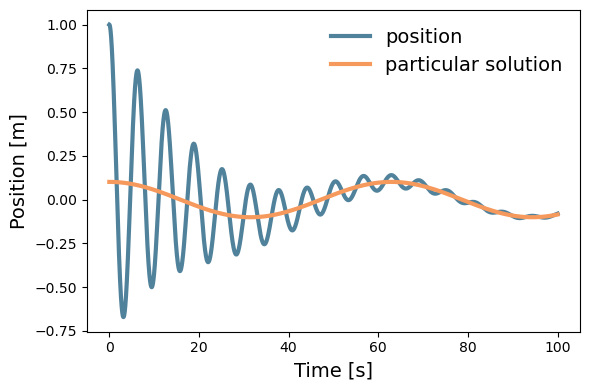

In [11]:
# Make a pretty plot
plt.figure(figsize=(6,4))
plt.plot(t_eval, sol[0], label="position", color="#51829B", linewidth=3)
plt.plot(t_eval, xp, label="particular solution", color="#F6995C", linewidth=3)
plt.xlabel("Time [s]", fontsize=14)
plt.ylabel("Position [m]", fontsize=14)
plt.legend(loc="upper right", fontsize=14, frameon=False, ncol=1)
plt.tight_layout() # make the layout nice and compact
plt.savefig("forced_oscillator_v2.pdf", dpi=300)

### Exercise 1

Now, try modify the above code with your own style.\
Submit your figure to here: https://drive.google.com/drive/folders/1Dv_krzBUEKLOWug5FyF1KSAiYjfMU6Ny?usp=sharing


In [12]:
# TODO
# Make a pretty plot
plt.figure(figsize=(6,4))
plt.plot(t_eval, sol[0], label="position", color="#51829B", linewidth=3)
plt.plot(t_eval, xp, label="particular solution", color="#F6995C", linewidth=3)
plt.xlabel("Time [s]", fontsize=14)
plt.ylabel("Position [m]", fontsize=14)
plt.legend(loc="upper right", fontsize=14, frameon=False, ncol=1)
plt.tight_layout() # make the layout nice and compact
plt.savefig("forced_oscillator_v2.pdf", dpi=300)


It is a common that we need to plot multiple lines in a figure.\
In general, we should not draw too many lines in a figure.\
However, if these lines are connected with some parameters,\
we could plot them together to see the varitaion of these parameters.

In [13]:
# run a series simulations with different parameters.
t_span = np.linspace(0,100, 5001)
t_eval = t_span
A = 1
y = np.array([A,0]) # initial condition
K = 1
M = 1
L = 0.1
F0 =0.1
WF = 0.1

sols = []
for L in np.linspace(0.01, 0.2, 20):
    args = (K,M,L,F0,WF)
    sol = solve_ivp(func_forced,t_span,y, "RK4", t_eval, args)
    sols.append(sol[0])


C:\Users\gillw\AppData\Local\Temp\ipykernel_22796\2204073043.py:13: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


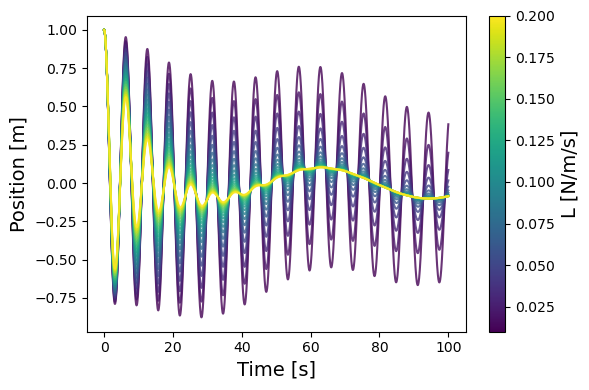

In [14]:
# make a colormap 
cmap = plt.get_cmap("viridis")
colors = cmap(np.linspace(0,1,20))

# Make a pretty plot
plt.figure(figsize=(6,4))
for i, sol in enumerate(sols):
    plt.plot(t_eval, sol, color=colors[i],alpha=0.8)

# colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=0.01, vmax=0.2))
sm._A = []
cbar = plt.colorbar(sm)
cbar.set_label("L [N/m/s]", fontsize=14)

plt.xlabel("Time [s]", fontsize=14)
plt.ylabel("Position [m]", fontsize=14)
plt.tight_layout() # make the layout nice and compact
plt.savefig("forced_oscillator_v3.pdf", dpi=300)

**References:**

* Color maps: https://matplotlib.org/stable/users/explain/colors/colormaps.html
* Color plate: https://colorhunt.co/  or https://coolors.co/

### Exercise 2: Forced Oscillations

Run 20 simulations with different $\omega_F$, ranging from 0.8 to 1.2.
Use a divergence colormap to visualize the results with different $\omega_F$.
Could you see the resonance at $\omega_F=1$?

Submit your plot to https://drive.google.com/drive/folders/1MVeTXhy5PfGIYjg4lOuGUdtYyxQdI0WV?usp=sharing

In [15]:
# TODO: 










To better visualize the resonance, we could compuate the averaged amplitudes in the last 40 seconds.\
Draw a plot of the Averaged amplitude vs the forced frequency ($\omega_f$).

In [16]:
#TODO 













### Exercise 3

Now, repeat the same calculations with 20 different L, ranging from 0.01 to 0.2
How could we visualize these results with changing two parameters?

Submit your plots here: https://drive.google.com/drive/folders/1XP6G_weYcWwanZPhMxr7U6C8HV32HX3r?usp=sharing

In [17]:
#TODO:













We have the averaged amplitude with differnt WF and L.
In principle, its is a 3D matrix. How do we visualize it?
Naively, we could make a 3D plot, but the viewing angle is a problem.
In this case, we could use a scatter plot instead of a 3D. 
The marksize could be used to represent the third dimension.

In [18]:
# TODO:















# Advanced Visualization for Project 2

In project 2, we have learned how to simulate a N-body system with Python.
The N-body simulation is fun when giving a special initial condition.

For example, we could use our logo to make a funny nbody simulation:

<img src="project2/figures/img_nthu_phys.png" alt="drawing" width="300"/>

**The question is how do we setup the initial condition?**

One simple solution is write a lot of `if` and `elif` statements to confine particles within certain area.
But the code will become extremely diffciult to handle when the condition is complex. 

A better way is to define a Bool matrix, showing with/without particles in a certain domain.
In this tutorial, we will use a `png` image as a filter. For exmaple, "black" means have particles and "white" means no particles. 

To do so, we could use the `imread()` function to load an impage file into a numpy mD array.
We could downsize the dimension to 2D by removing the color information. 

`ndimage` is a powerful `scipy` package to process multidimensional image. 
To throw particles inside the image domain is similar to the mon 


In [19]:
from project2.solutions.nbody import Particles 
from project2.solutions.nbody import NBodySimulator
from project2.solutions.nbody import load_files, save_movie
import matplotlib.animation as animation

In [20]:
def initial_particles(N=1000):

    # load the image
    image_path = 'project2/figures/img_nthu_phys.png'
    img = plt.imread(image_path)
    img  = ndimage.rotate(img, 270)
    xy_img = img[:,:,0] # take only one channel
    mask = xy_img < 0.7 # thresholding
    (xsize,ysize)=np.shape(xy_img) # size of the image

    # create particles
    pts = Particles(N)
    totalMass = 1.0
    mass = totalMass*np.ones((N,1))/N
    vel  = np.random.rand(N,3)
    vel -= np.mean(mass*vel,0)/np.mean(mass) # - CM velocity
    acc  = np.zeros((N,3))

    # for postions
    thickness = 1
    pos      = np.random.rand(N,3)
    pos[:,2] = np.random.rand(N)*thickness - (thickness/2)

    # randomize the positions
    count = 0
    while count < N:
        [i,j] = np.random.randint(xsize,size=2)
        if mask[i,j]:
            x = i + np.random.rand()-0.5
            y = j + np.random.rand()-0.5
            pos[count,0] = x/xsize
            pos[count,1] = y/ysize
            count +=1

    pts.positions = pos
    pts.velocities = vel
    pts.accelerations = acc

    return pts

In [21]:
pts = initial_particles(N=1000)

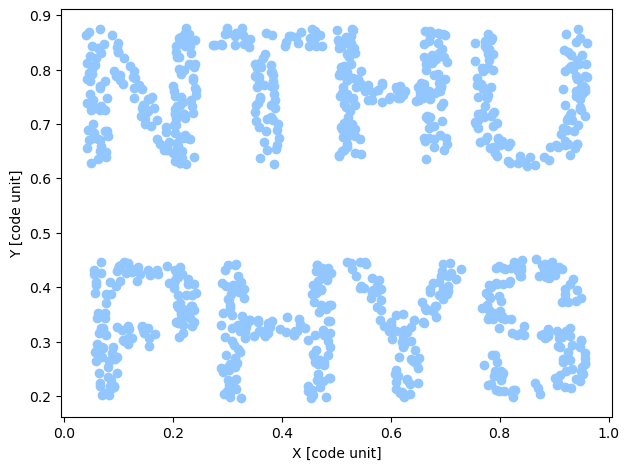

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='X [code unit]', ylabel='Y [code unit]'>)

In [22]:
pts.draw()

In [23]:
simulation = NBodySimulator(pts)
simulation.setup(G=1, rsoft=0.01, io_freq=1)
simulation.evolve(dt=0.001, tmax=0.1)

n= 0 Time:  0.0  dt:  0.001
n= 1 Time:  0.001  dt:  0.001
n= 2 Time:  0.002  dt:  0.001
n= 3 Time:  0.003  dt:  0.001
n= 4 Time:  0.004  dt:  0.001
n= 5 Time:  0.005  dt:  0.001
n= 6 Time:  0.006  dt:  0.001
n= 7 Time:  0.007  dt:  0.001
n= 8 Time:  0.008  dt:  0.001
n= 9 Time:  0.009000000000000001  dt:  0.001
n= 10 Time:  0.010000000000000002  dt:  0.001
n= 11 Time:  0.011000000000000003  dt:  0.001
n= 12 Time:  0.012000000000000004  dt:  0.001
n= 13 Time:  0.013000000000000005  dt:  0.001
n= 14 Time:  0.014000000000000005  dt:  0.001
n= 15 Time:  0.015000000000000006  dt:  0.001
n= 16 Time:  0.016000000000000007  dt:  0.001
n= 17 Time:  0.017000000000000008  dt:  0.001
n= 18 Time:  0.01800000000000001  dt:  0.001
n= 19 Time:  0.01900000000000001  dt:  0.001
n= 20 Time:  0.02000000000000001  dt:  0.001
n= 21 Time:  0.02100000000000001  dt:  0.001
n= 22 Time:  0.022000000000000013  dt:  0.001
n= 23 Time:  0.023000000000000013  dt:  0.001
n= 24 Time:  0.024000000000000014  dt:  0.001
n

In [24]:
def save_movie_fun(fns, lengthscale=1.0, filename='movie.mp4',fps=30):

    plt.style.use('dark_background')
    scale = lengthscale

    fig, ax = plt.subplots()
    fig.set_linewidth(5)
    fig.set_size_inches(10, 10, forward=True)
    fig.set_dpi(72)

    fn = fns[0]
    m,t,x,y,z,vx,vy,vz,accx,accy,accz = np.loadtxt(fn)
    vmag= np.sqrt(vx**2 + vy**2 + vz**2)
    #line, = ax.plot([], [], '.', color='w', markersize=2)
    line = ax.scatter(x, y, s=3, c=vmag/np.max(vmag), cmap='viridis', alpha=0.8)

    def init():
        plt.xticks(fontsize=14)
        plt.yticks(fontsize=14)
        ax.set_xlim(0, scale)
        ax.set_ylim(0, scale)
        ax.set_aspect('equal')
        ax.grid(False)
        plt.axis('off')
        #ax.set_xlabel('X [code unit]', fontsize=18)
        #ax.set_ylabel('Y [code unit]', fontsize=18)
        return line, 

    def update(frame):
        fn = fns[frame]
        m,t,x,y,z,vx,vy,vz,ax,ay,az = np.loadtxt(fn)
        vmag= np.sqrt(vx**2 + vy**2 + vz**2)
        #line.set_data(x, y)
        line.set_offsets(np.c_[x,y])
        # update colors
        line.set_color(plt.cm.viridis(vmag/np.max(vmag)))

        plt.title("Frame ="+str(frame),size=18)
        return line,

    ani = animation.FuncAnimation(fig, update, frames=len(fns), init_func=init, blit=True)
    ani.save(filename, writer='ffmpeg', fps=fps)
    return

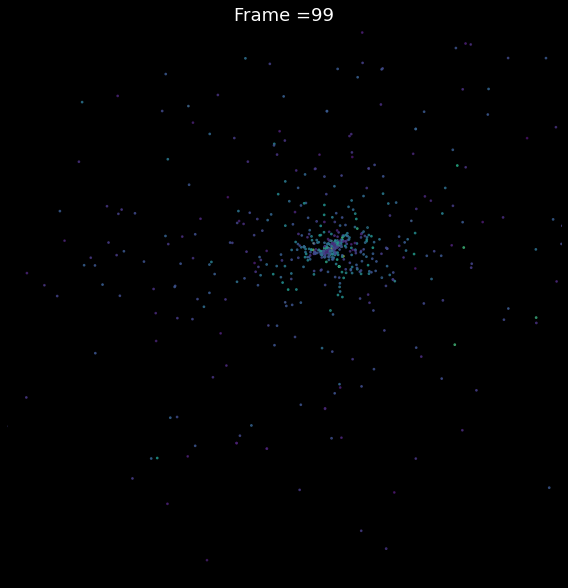

In [25]:
# load data files and make a movie
fns = load_files('nbody')
save_movie_fun(fns, lengthscale=1, filename='nbody_fun_movie.mp4',fps=10)

### Exercise 4

Now, create a new figure in `./project2/figures`. Use this figure as an initial condition for a n-body simulation.

Submit your results to https://drive.google.com/drive/folders/1egcwyf1o84Uyodzmet7OjvtxkMdL1w65?usp=sharing

In [26]:
# TODO










